In [16]:
import eniric
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [85]:
hdu = fits.open('car-20160325T05h28m38s-sci-gtoc-nir_A_input_TAC.fits')
data_tell = hdu[1].data
wave = data_tell['WAVE']
flux_in = data_tell['SPEC']
flux_corr = data_tell['tacflux']
trans = data_tell['mtrans']
hdu[1].data

FITS_rec([( 9603.57189376, 0.        ,        nan, 1., 0.96443522, 0.        , 1.03687628, 0),
          ( 9603.62526357, 0.        ,        nan, 1., 0.94997362, 0.        , 1.05266081, 0),
          ( 9603.67862802, 0.45232666, 0.00488878, 1., 0.91125882, 0.49637562, 1.09738307, 1),
          ...,
          (17118.34389531, 0.75255471, 0.00470383, 1., 0.99919629, 0.75316004, 1.00080436, 1),
          (17118.39832382, 0.68448812, 0.00440724, 1., 0.99918708, 0.68504501, 1.00081358, 1),
          (17118.45274135, 0.62118304, 0.00378498, 1., 0.99917194, 0.62169784, 1.00082874, 1)],
         dtype=(numpy.record, [('WAVE', '>f8'), ('SPEC', '>f8'), ('CONT', '>f8'), ('SIG', '>f8'), ('mtrans', '>f8'), ('tacflux', '>f8'), ('tacdflux', '>f8'), ('tacqual', '>i4')]))

<IPython.core.display.Javascript object>


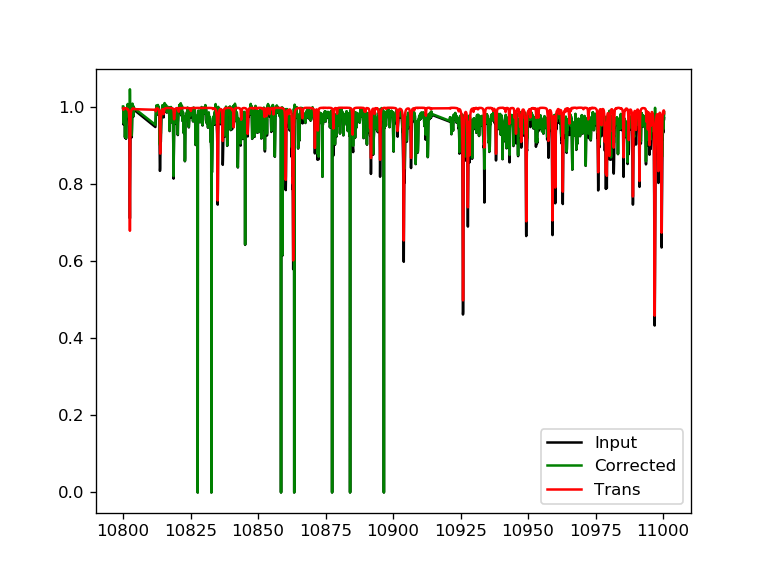

In [86]:
# J_band = (wave > 10920) & (wave < 11004)
J_band = (wave > 10800) & (wave < 11004)
# mask_zeros = 
plt.plot(wave[J_band], flux_in[J_band], 'k-', label='Input')
plt.plot(wave[J_band], flux_corr[J_band], 'g-', label='Corrected')
plt.plot(wave[J_band], data_tell['mtrans'][J_band], 'r-', label='Trans')
plt.legend()
# plt.plot(wave[J_band], trans[J_band], 'b--')
#plt.plot(wave, flux_corr, 'g-', label='Corrected')

In [87]:
# Removing zeros flux points
mask = J_band & (flux_corr > 0.)
# plt.figure()
# plt.plot(wave[J_band], J_band[J_band], 'kx')
# plt.plot(wave[J_band], mask[J_band], 'r.')

In [88]:
from eniric.Qcalculator import rv_precision
rv_bf = rv_precision(wave[mask], flux_in[mask], mask=trans[mask]**2)
rv_mask = rv_precision(wave[mask], flux_corr[mask], mask=trans[mask]**2)
rv_af = rv_precision(wave[mask], flux_corr[mask])
print('RV precision: ', rv_bf, 
      '\nafter masking/perfect tell? :', rv_mask, 
      '\nafter telluric correction :', rv_af)

RV precision:  1385.53148402973 m / s 
after masking/perfect tell? : 2027.2445844157635 m / s 
after telluric correction : 1981.776711169914 m / s


In [89]:
from eniric.Qcalculator import quality
q = quality(wave[mask], flux_in[mask])
q_af = quality(wave[mask], flux_corr[mask])
print(q, q_af)

4074.9553816447283 2459.9706882197256


In [97]:
from eniric.atmosphere import Atmosphere
# Assuming K is the correct band, and you want to mask seasonal variation.
atm = Atmosphere.from_band("Y", bary=True)

# Obtain closet telluric model values at the wavelength values (telluric mask is super sampled).
atm = atm.at(wave[mask]*0.0001)

In [105]:
# 0 when below 2%
# 1 when above 2%
# mask_tell = trans[mask] > 0.0
rv_bf = rv_precision(wave[mask], flux_in[mask], mask=atm.mask)
rv_mask = rv_precision(wave[mask], flux_corr[mask], mask=trans[mask]**2)
rv_corr_mask = rv_precision(wave[mask], flux_corr[mask], mask=atm.mask)
rv_af = rv_precision(wave[mask], flux_corr[mask])
print('RV precision: ', rv_bf, 
      '\nafter masking/perfect tell? :', rv_mask, 
      '\nafter telluric correction :', rv_af,
     '\ncorr mask', rv_corr_mask)

RV precision:  4426.722649213304 m / s 
after masking/perfect tell? : 2027.2445844157635 m / s 
after telluric correction : 1981.776711169914 m / s 
corr mask 4423.959920150507 m / s
